In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../../analysis_and_preprocessing/miniboone_preprocessed_data.csv")

In [3]:
X = df.drop(columns = ['Class'])
Y = df['Class']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)

In [5]:
dtc = DecisionTreeClassifier(max_depth=3)
model_dtc = dtc.fit(X_train, Y_train)

In [6]:
Y_pred = dtc.predict(X_test)
Y_train_pred = dtc.predict(X_train)

In [7]:
plt.figure(figsize = (100,100))
plot_tree(dtc, feature_names = list(X.columns), class_names = ['1','0'], filled = True)
plt.show()

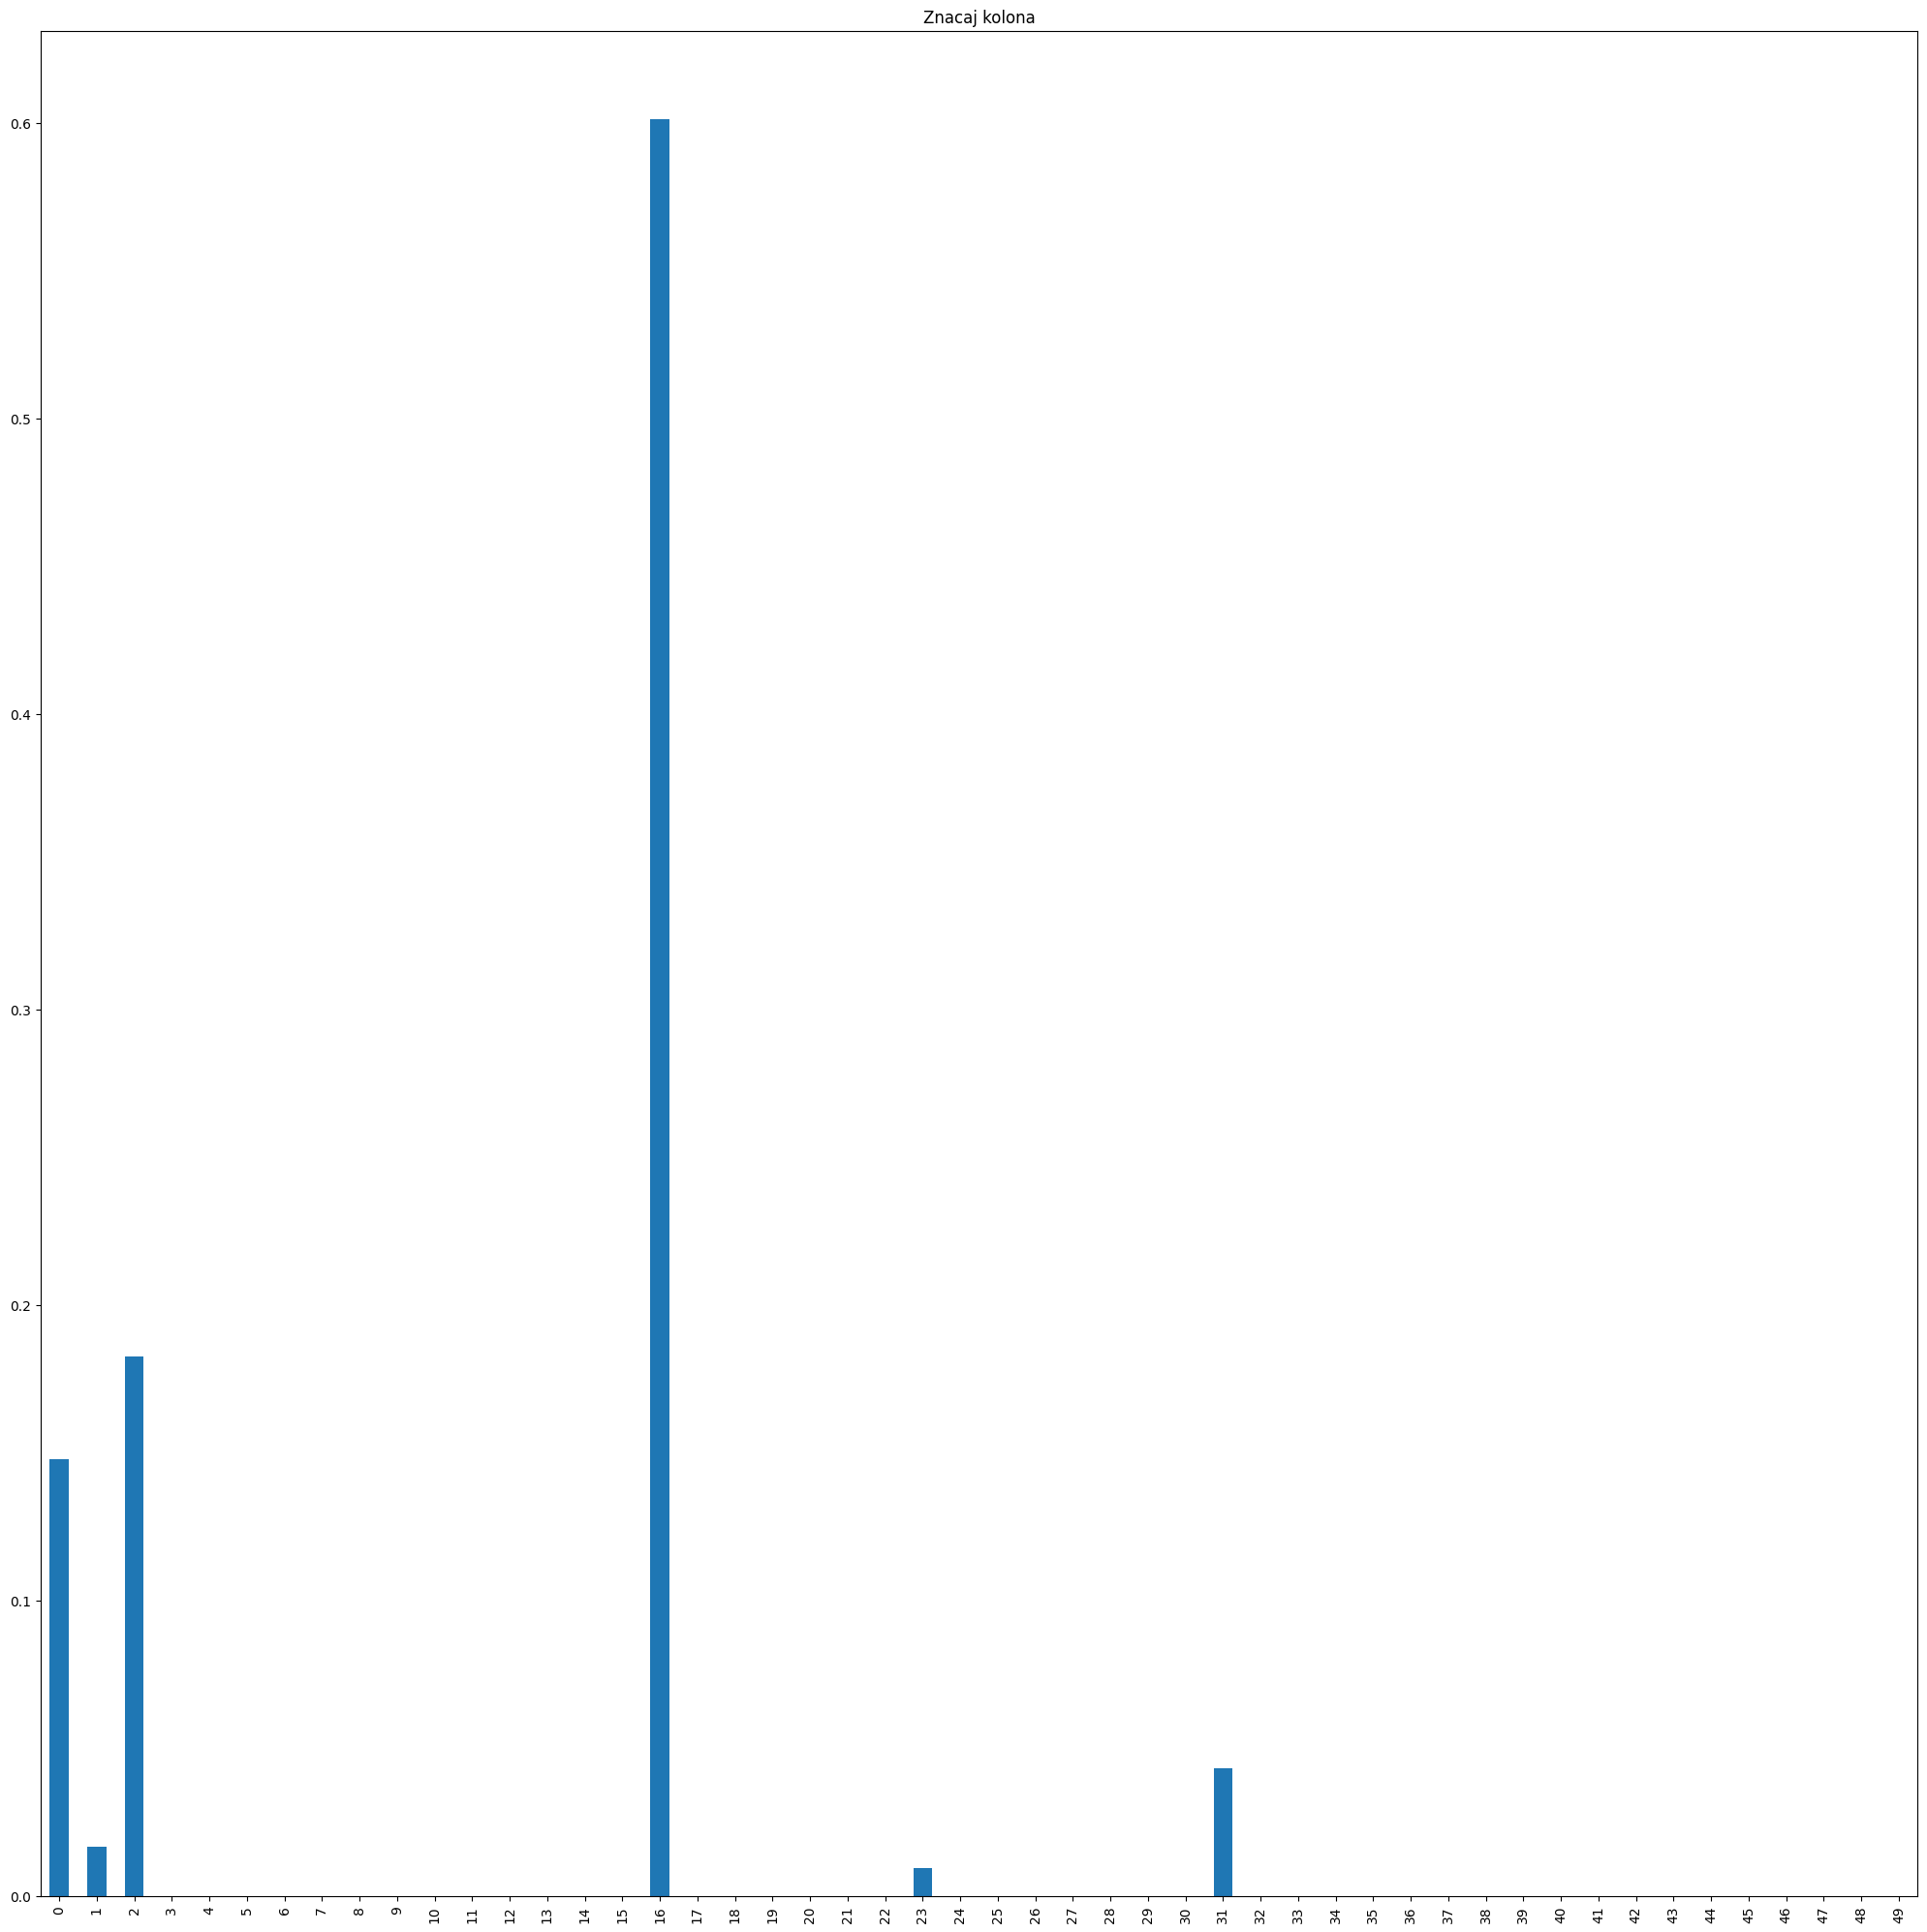

In [8]:
plt.figure(figsize = (25,25))
pd.Series(dtc.feature_importances_, index = X.columns).plot.bar()
plt.title("Znacaj kolona")
plt.show()

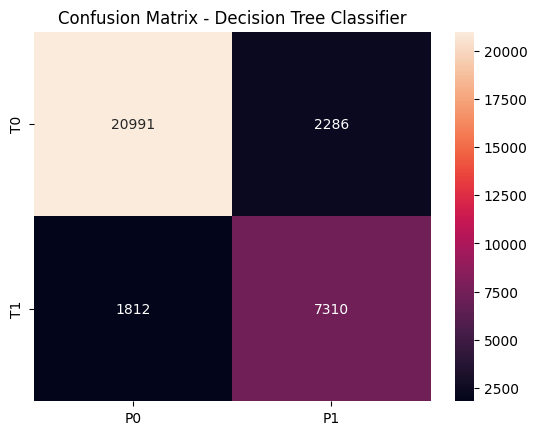

In [9]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
sb.heatmap(cm, annot=True, fmt = 'd', xticklabels = ["P0", "P1"], yticklabels = ["T0", "T1"])

plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

In [10]:
print('Train data report')
print(metrics.classification_report(Y_train, Y_train_pred))

Train data report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     69831
           1       0.76      0.80      0.78     27366

    accuracy                           0.87     97197
   macro avg       0.84      0.85      0.85     97197
weighted avg       0.88      0.87      0.87     97197



In [11]:
print('Test data report')
print(metrics.classification_report(Y_test, Y_pred))

Test data report
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     23277
           1       0.76      0.80      0.78      9122

    accuracy                           0.87     32399
   macro avg       0.84      0.85      0.85     32399
weighted avg       0.88      0.87      0.87     32399



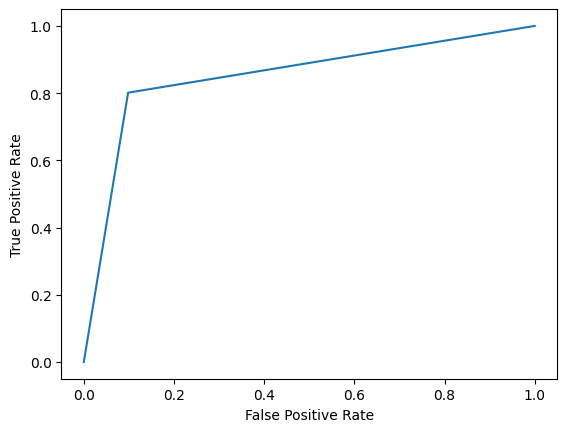

Povrsina ispod krive: 
0.851575409496095


In [12]:
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Povrsina ispod krive: ")
print(metrics.roc_auc_score(Y_test, Y_pred))

In [41]:
pca = PCA(n_components = 0.9, svd_solver = 'full')
pca.fit(X_train)

PCA(n_components=0.9, svd_solver='full')

In [42]:
pca.components_.shape

(20, 50)

<Figure size 10000x20000 with 0 Axes>

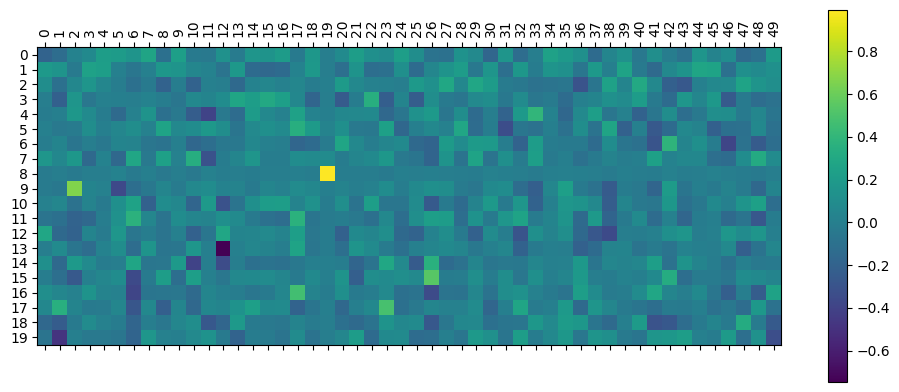

In [43]:
plt.figure(figsize = (100,200))
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]),
           rotation='vertical')
plt.yticks(ticks=range(pca.n_components_))
plt.colorbar()
plt.show()

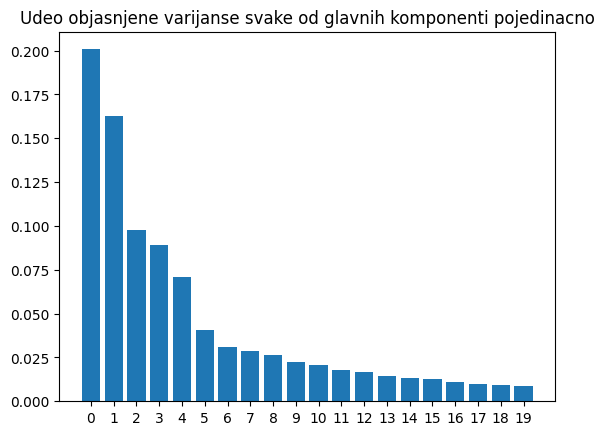

In [44]:
plt.bar(x=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],
        height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse svake od glavnih komponenti pojedinacno')
plt.show()

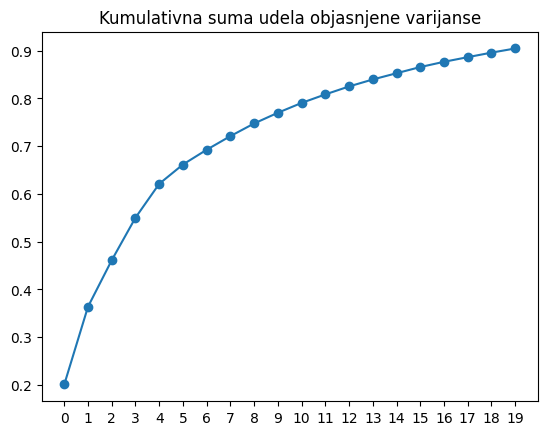

In [45]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'], cumulative_variance_ratio, marker='o')
plt.title('Kumulativna suma udela objasnjene varijanse')
plt.show()

In [46]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(10, 21, 1),
    'min_impurity_decrease': np.linspace(0.0, 1.0, 11)
}
dtc_gcv = GridSearchCV(DecisionTreeClassifier(), params)

In [48]:
dtc_gcv.fit(X_train_pca,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 21),
                         'min_impurity_decrease': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [49]:
dtc_gcv.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_impurity_decrease': 0.0}

In [50]:
dtc_gcv.best_score_

0.8968795400278216

In [51]:
dtc_gcv.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [53]:
Y_train_pred = dtc_gcv.best_estimator_.predict(X_train_pca)
print('Train data report')
print(metrics.classification_report(Y_train, Y_train_pred))

Train data report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     69831
           1       0.87      0.87      0.87     27366

    accuracy                           0.93     97197
   macro avg       0.91      0.91      0.91     97197
weighted avg       0.93      0.93      0.93     97197



In [54]:
Y_pred = dtc_gcv.best_estimator_.predict(X_test_pca)
print('Test data report')
print(metrics.classification_report(Y_test, Y_pred))

Test data report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     23277
           1       0.82      0.82      0.82      9122

    accuracy                           0.90     32399
   macro avg       0.88      0.87      0.87     32399
weighted avg       0.90      0.90      0.90     32399



In [58]:
plt.figure(figsize = (100,100))
plot_tree(dtc_gcv.best_estimator_, feature_names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'], class_names = ['1','0'], filled = True)
plt.show()

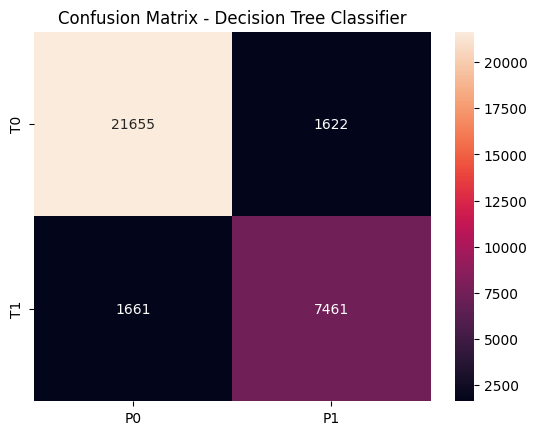

In [59]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
sb.heatmap(cm, annot=True, fmt = 'd', xticklabels = ["P0", "P1"], yticklabels = ["T0", "T1"])

plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

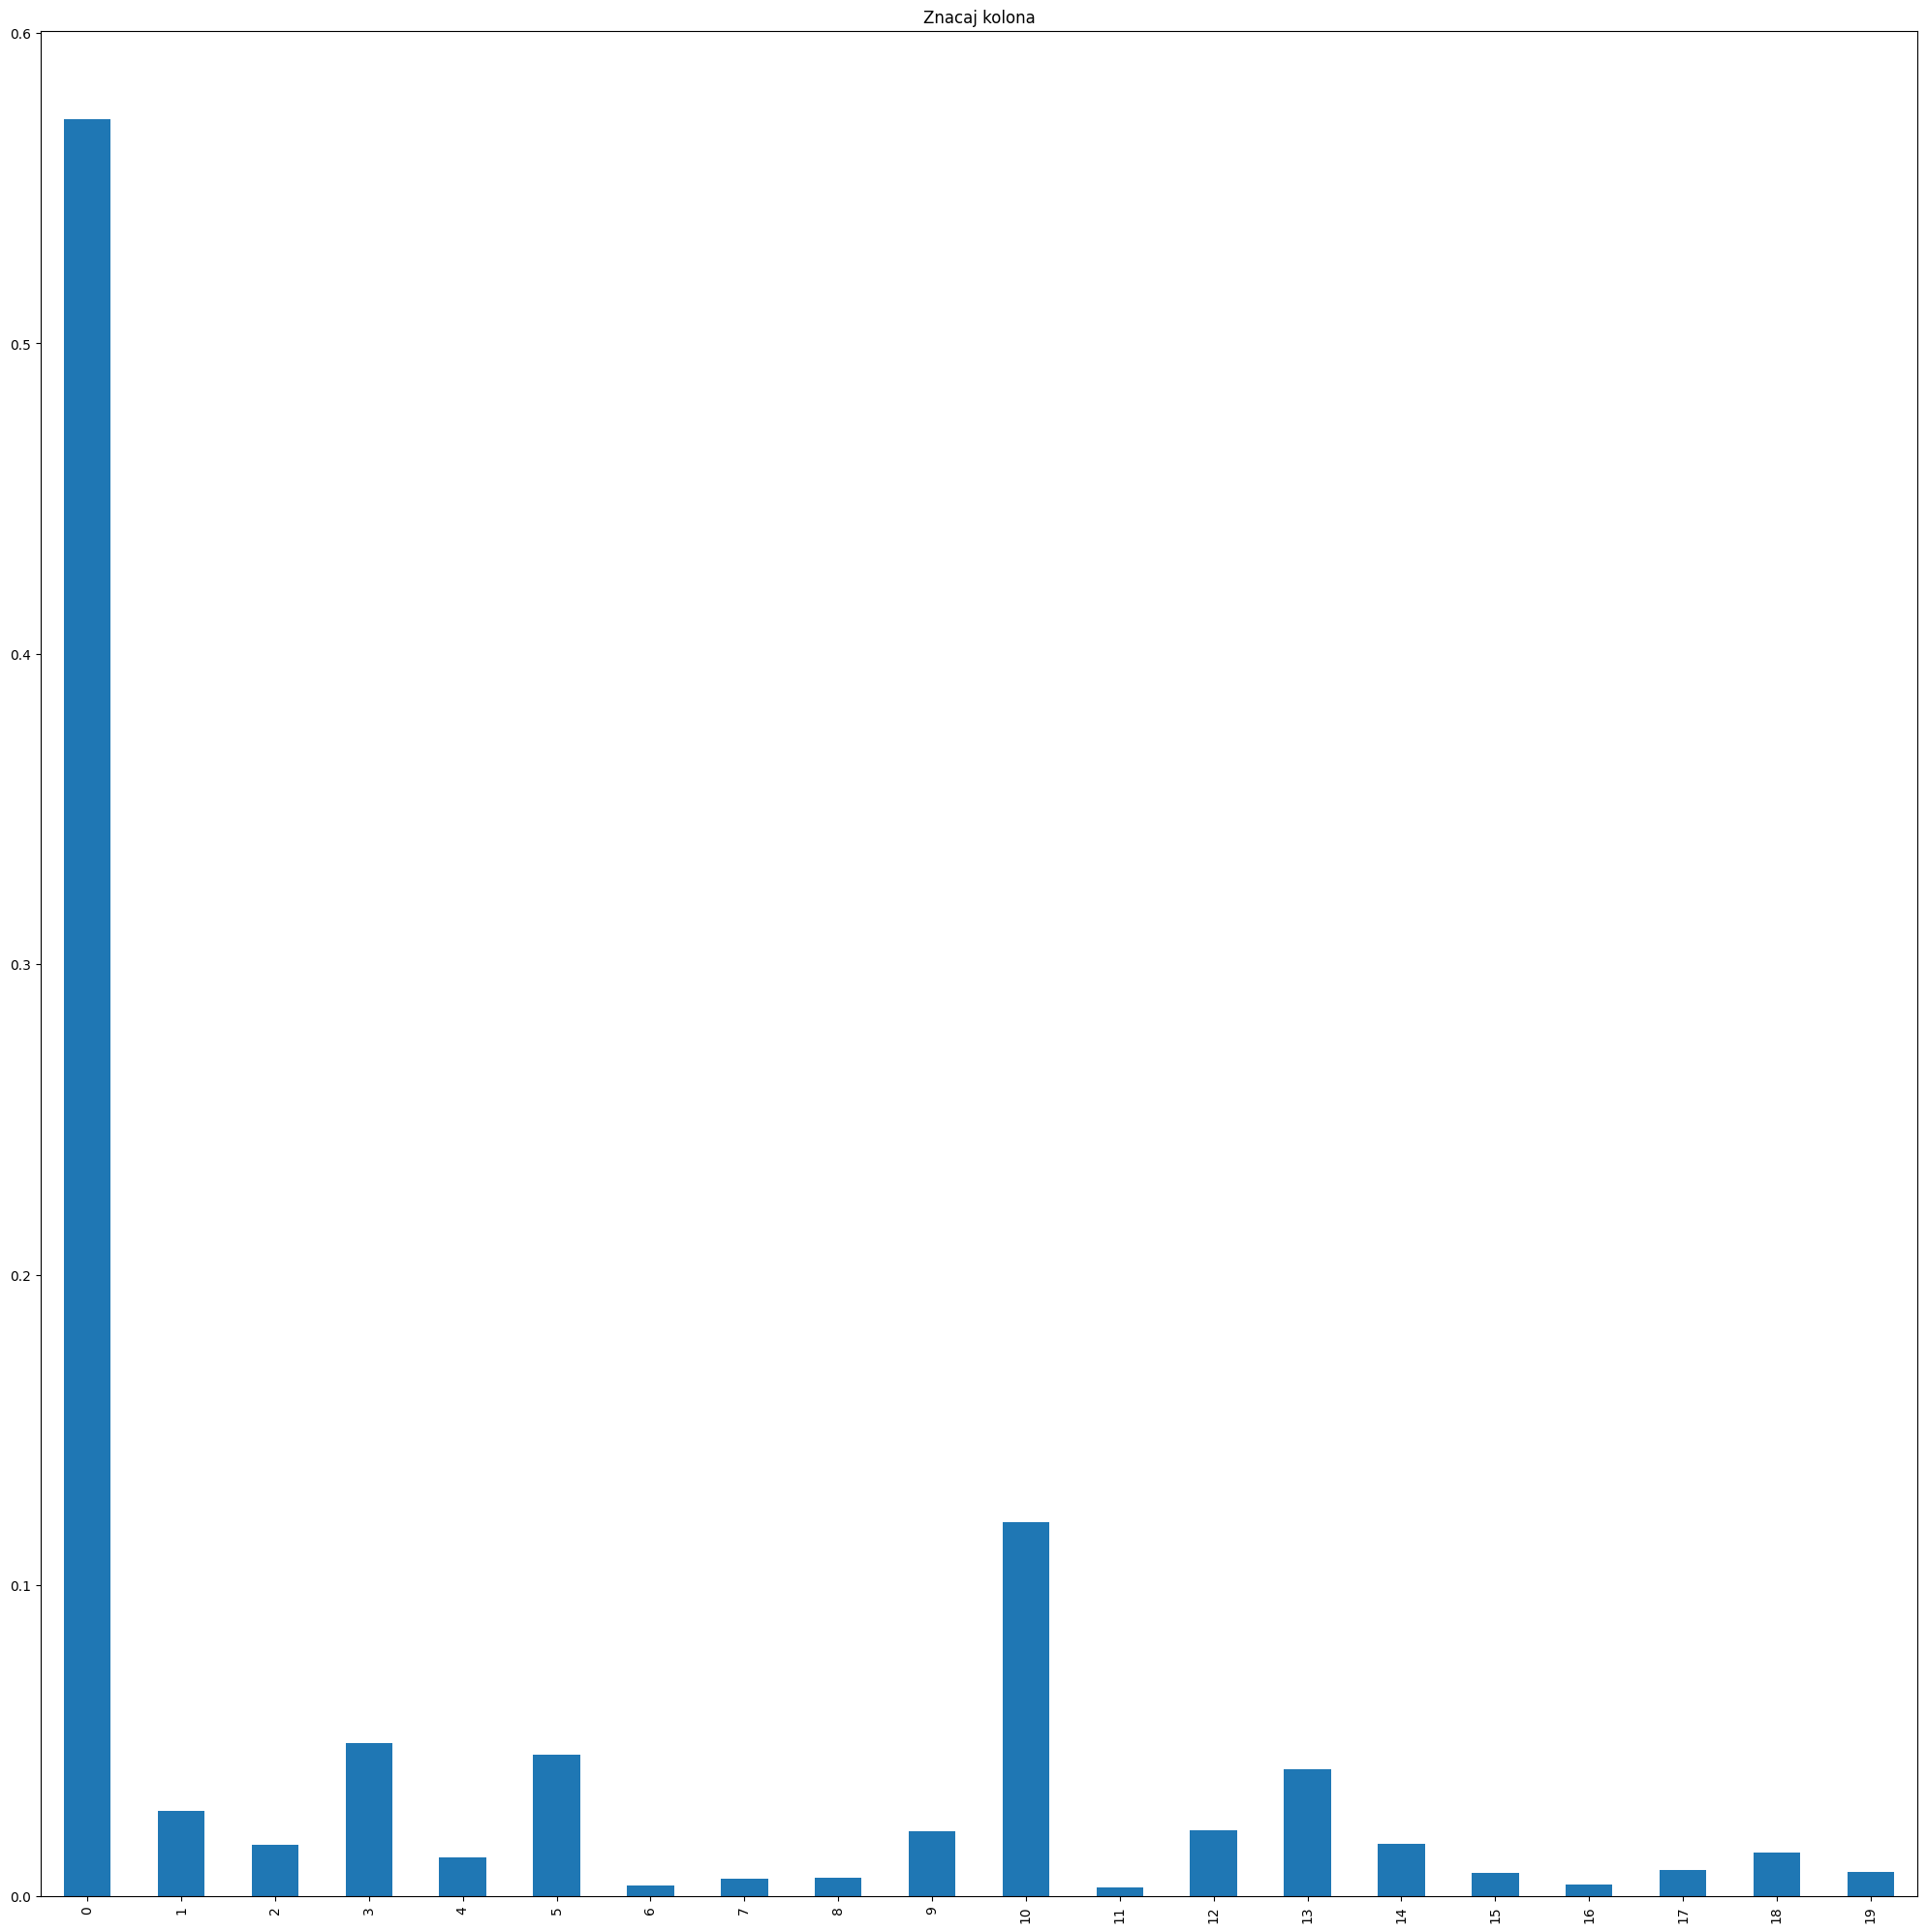

In [61]:
plt.figure(figsize = (25,25))
pd.Series(dtc_gcv.best_estimator_.feature_importances_, index = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']).plot.bar()
plt.title("Znacaj kolona")
plt.show()

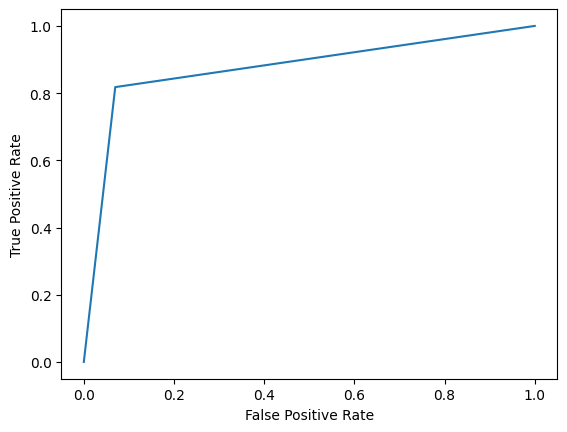

Povrsina ispod krive: 0.874115


In [62]:
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Povrsina ispod krive: %f" % metrics.roc_auc_score(Y_test, Y_pred))

In [67]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2, 8, 2),
    'n_estimators': [10,15]
}
rfc_gcv = GridSearchCV(RandomForestClassifier(),params)

In [68]:
rfc_gcv.fit(X_train_pca,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 8, 2),
                         'n_estimators': [10, 15]})

In [69]:
rfc_gcv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 10}

In [70]:
rfc_gcv.best_score_

0.8911797832493628

In [71]:
rfc_gcv.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=10)

In [72]:
Y_train_pred = rfc_gcv.best_estimator_.predict(X_train_pca)
print('Train data report')
print(metrics.classification_report(Y_train, Y_train_pred))

Train data report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     69831
           1       0.87      0.75      0.80     27366

    accuracy                           0.90     97197
   macro avg       0.89      0.85      0.87     97197
weighted avg       0.90      0.90      0.89     97197



In [74]:
Y_pred = rfc_gcv.best_estimator_.predict(X_test_pca)
print('Test data report')
print(metrics.classification_report(Y_test, Y_pred))

Test data report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     23277
           1       0.87      0.74      0.80      9122

    accuracy                           0.89     32399
   macro avg       0.89      0.85      0.86     32399
weighted avg       0.89      0.89      0.89     32399



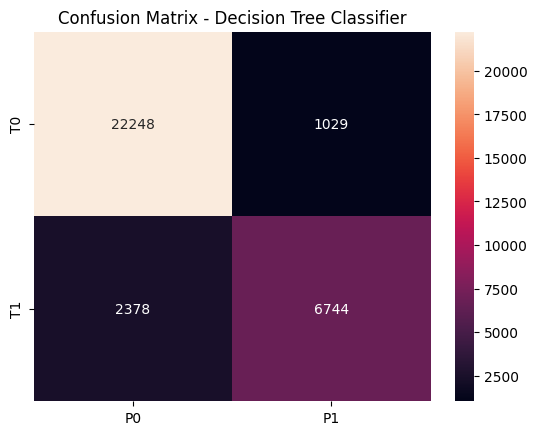

In [77]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
sb.heatmap(cm, annot=True, fmt = 'd', xticklabels = ["P0", "P1"], yticklabels = ["T0", "T1"])

plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

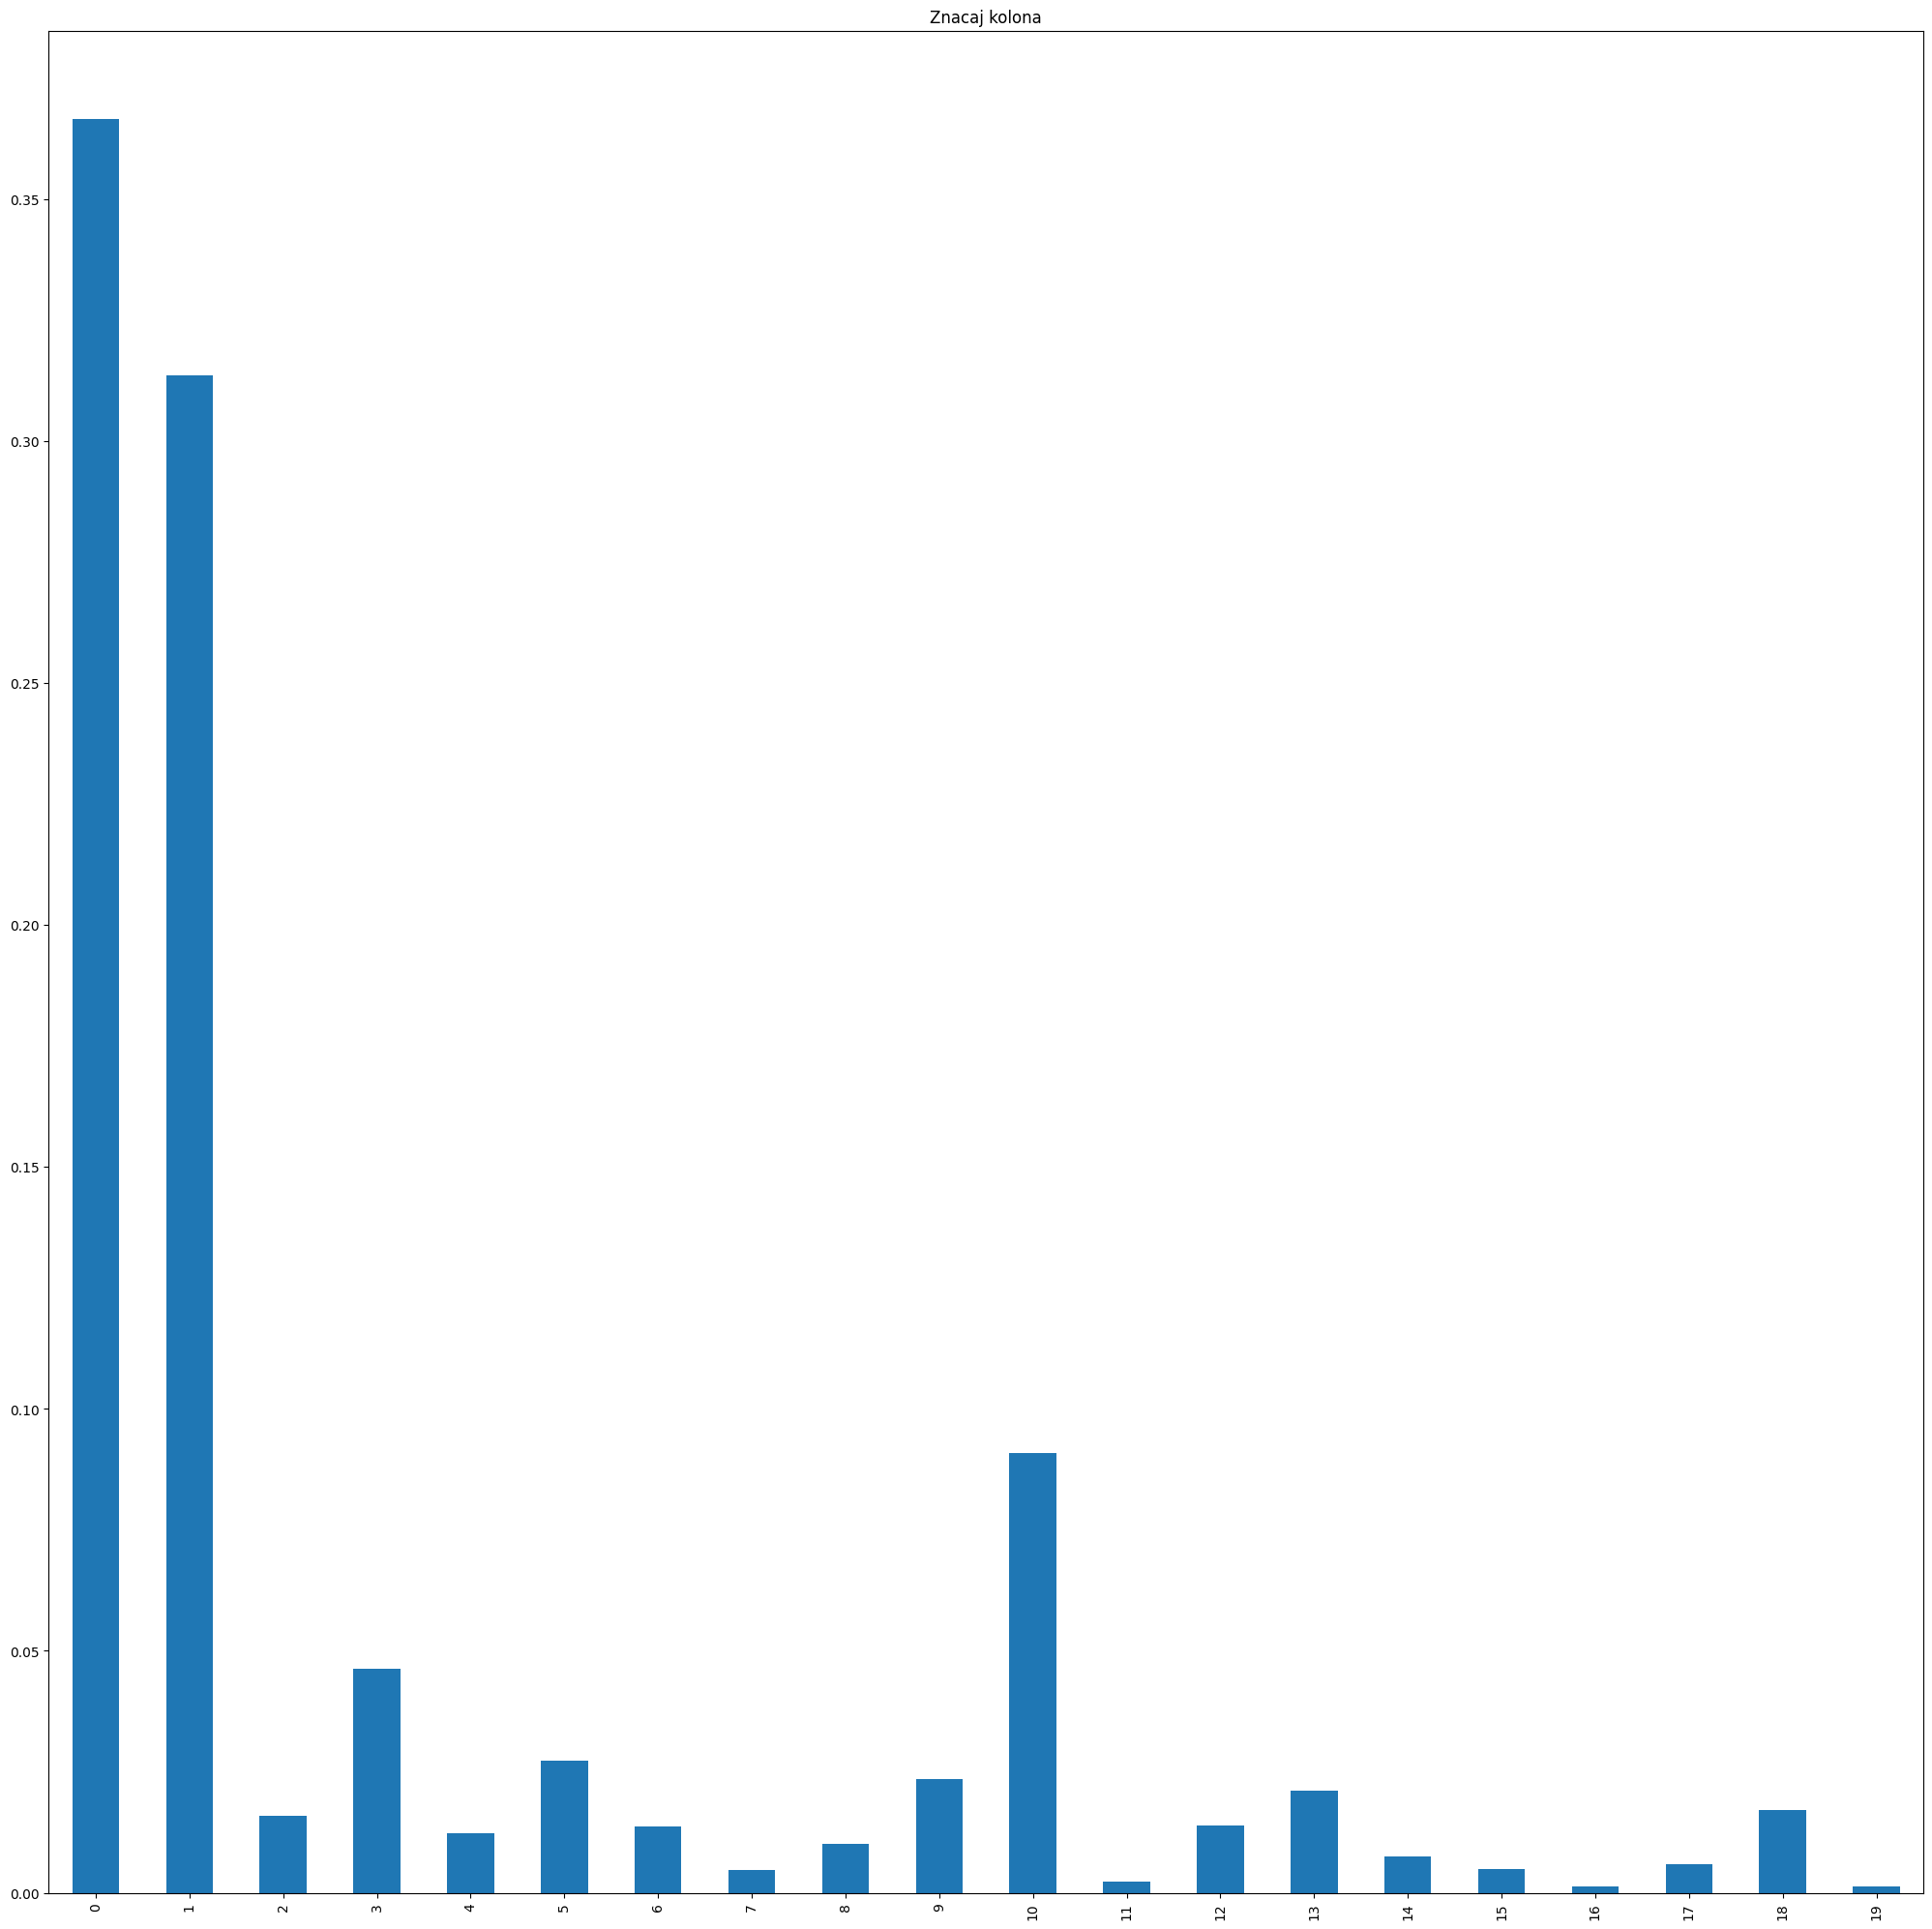

In [75]:
plt.figure(figsize = (25,25))
pd.Series(rfc_gcv.best_estimator_.feature_importances_, index = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']).plot.bar()
plt.title("Znacaj kolona")
plt.show()

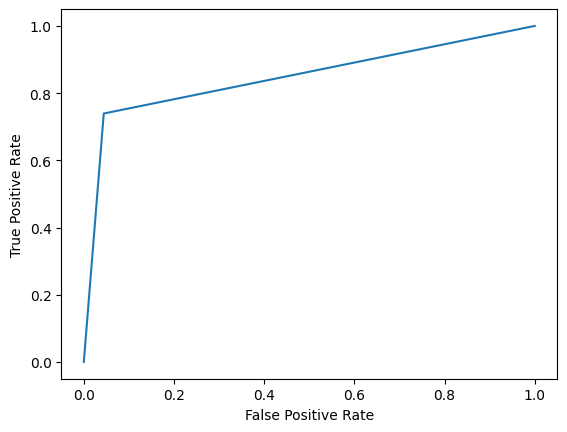

Povrsina ispod krive: 0.847552


In [76]:
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("Povrsina ispod krive: %f" % metrics.roc_auc_score(Y_test, Y_pred))